In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:/Swinburne/Sem 3/Innovation Project/Data Sciencne/fraudTest.csv")

In [3]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [4]:
#Display the data
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [6]:
#Sum the missing value
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
#Summary the description of the dataset
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


# Data Pre-processing

In [8]:
# Drop the first column
df.drop(df.columns[0], axis=1, inplace=True)

In [24]:
# Convert 'trans_date_trans_time'and 'dob' to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

In [10]:
import datetime
# Extract the date and time components
df['trans_date'] = df['trans_date_trans_time'].dt.date
df['trans_time'] = df['trans_date_trans_time'].dt.time

In [11]:
df['trans_date'] = pd.to_datetime(df['trans_date'])

In [12]:
# Format the datetime object as a string
df['trans_time'] = df['trans_date_trans_time'].dt.strftime('%H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   cc_num                 555719 non-null  int64         
 2   merchant               555719 non-null  object        
 3   category               555719 non-null  object        
 4   amt                    555719 non-null  float64       
 5   first                  555719 non-null  object        
 6   last                   555719 non-null  object        
 7   gender                 555719 non-null  object        
 8   street                 555719 non-null  object        
 9   city                   555719 non-null  object        
 10  state                  555719 non-null  object        
 11  zip                    555719 non-null  int64         
 12  lat                    555719 non-null  floa

In [13]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21,12:14:25
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21,12:14:33
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21,12:14:53
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020-06-21,12:15:15
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21,12:15:17


# EDA

In [14]:
#Distribute the class
df[('is_fraud')].value_counts()

0    553574
1      2145
Name: is_fraud, dtype: int64

C:\Users\DELL\AppData\Local\Temp\ipykernel_19348\3018171374.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


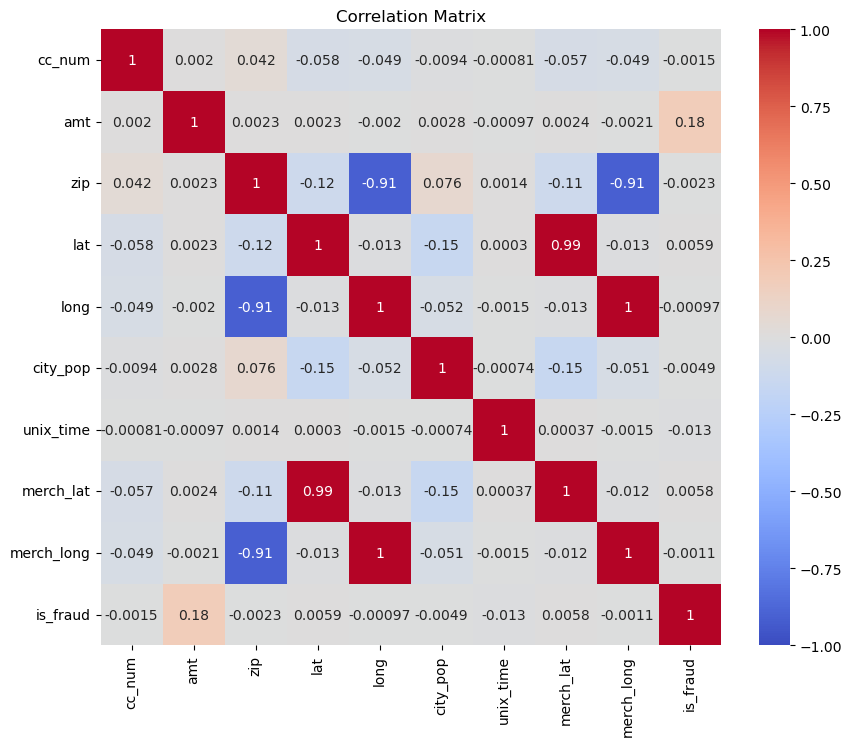

In [15]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

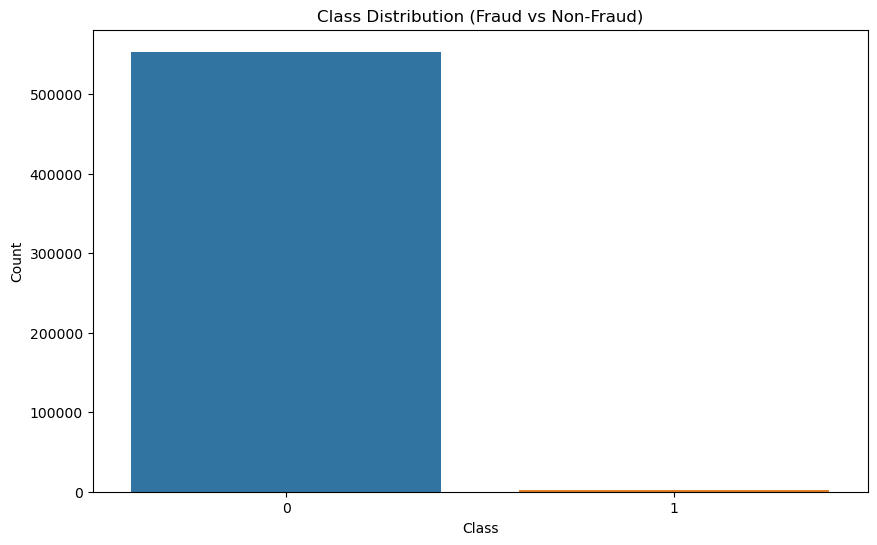

In [16]:
# Plot the class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='is_fraud', data=df)
plt.title('Class Distribution (Fraud vs Non-Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

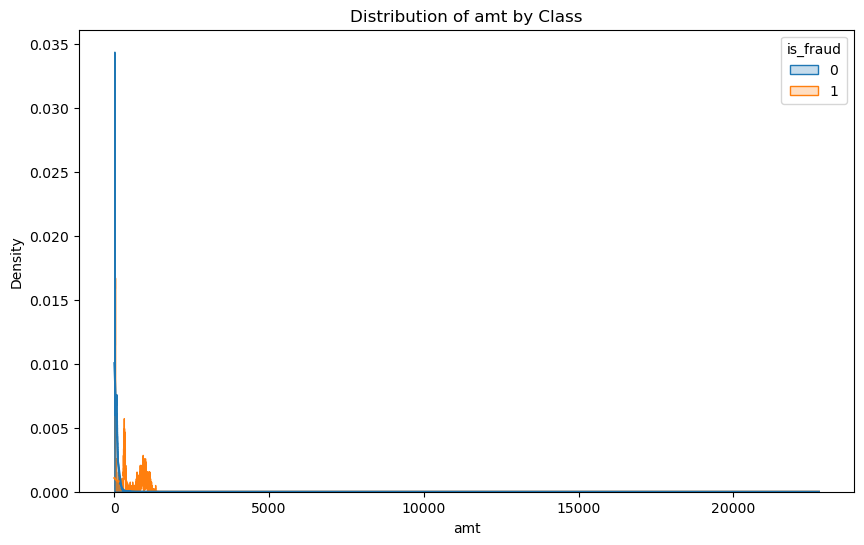

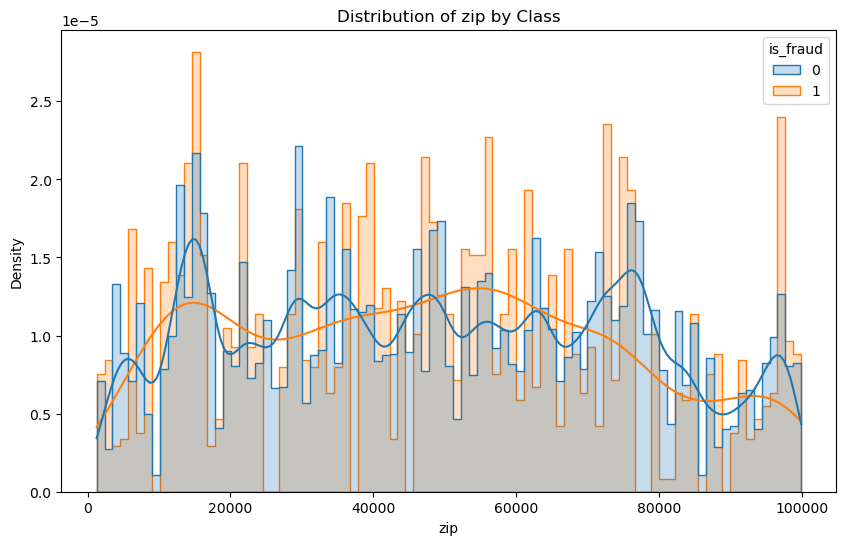

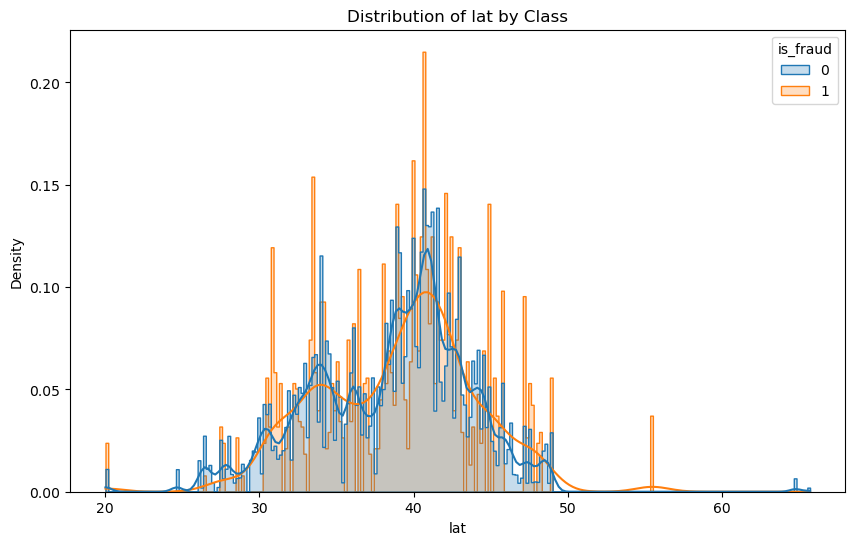

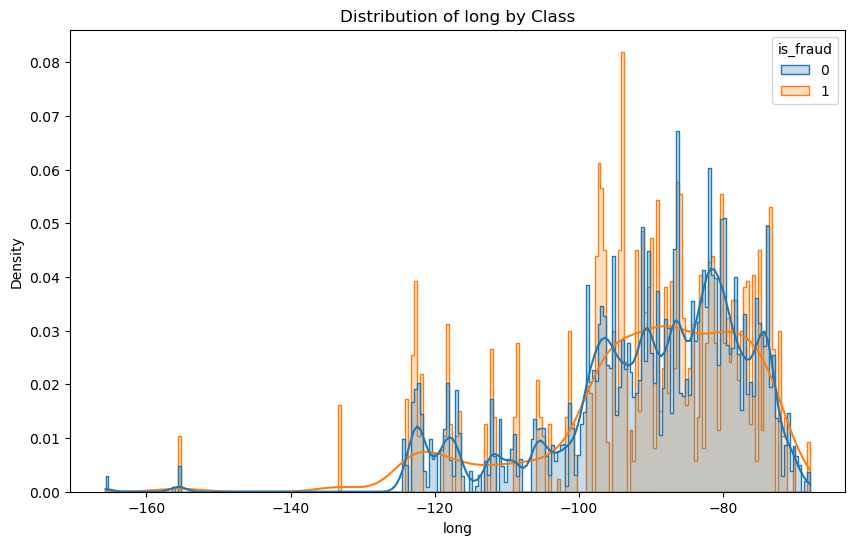

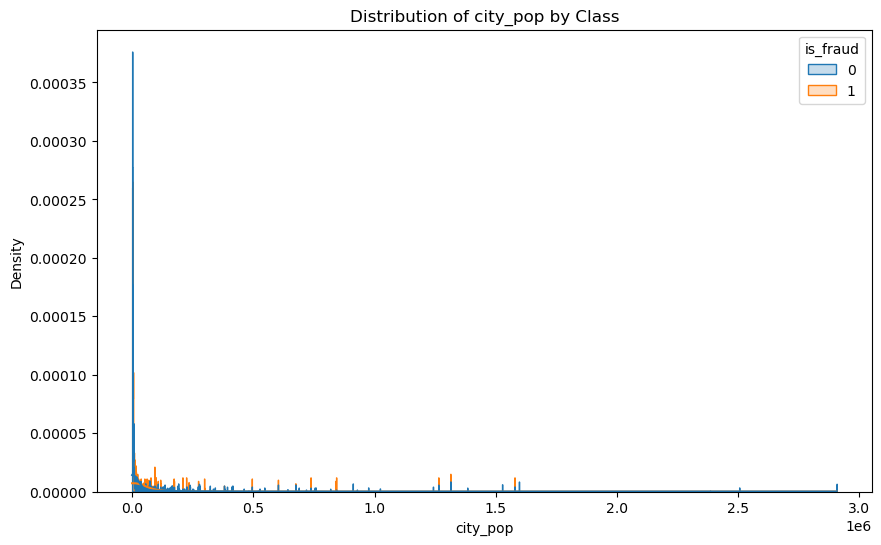

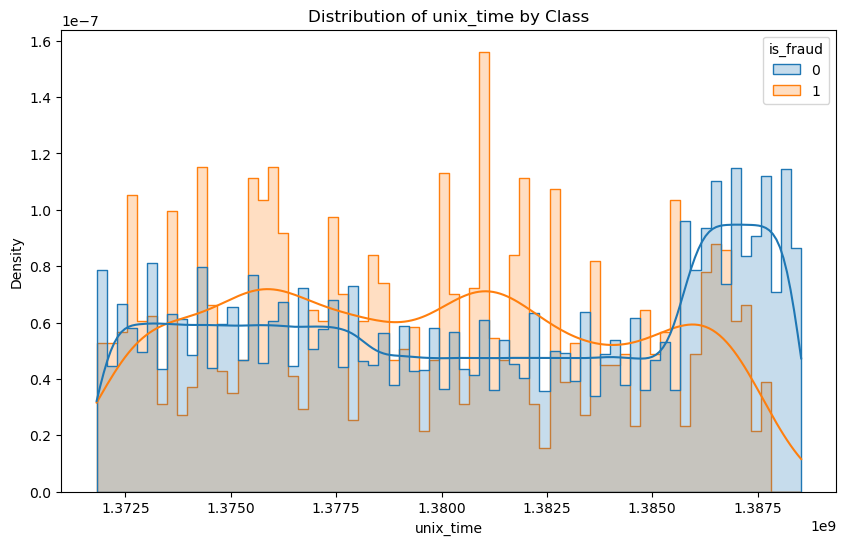

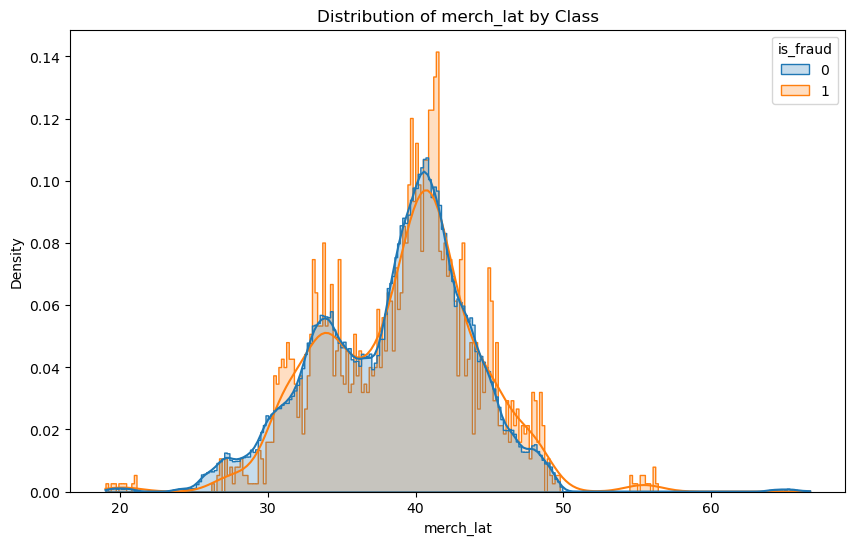

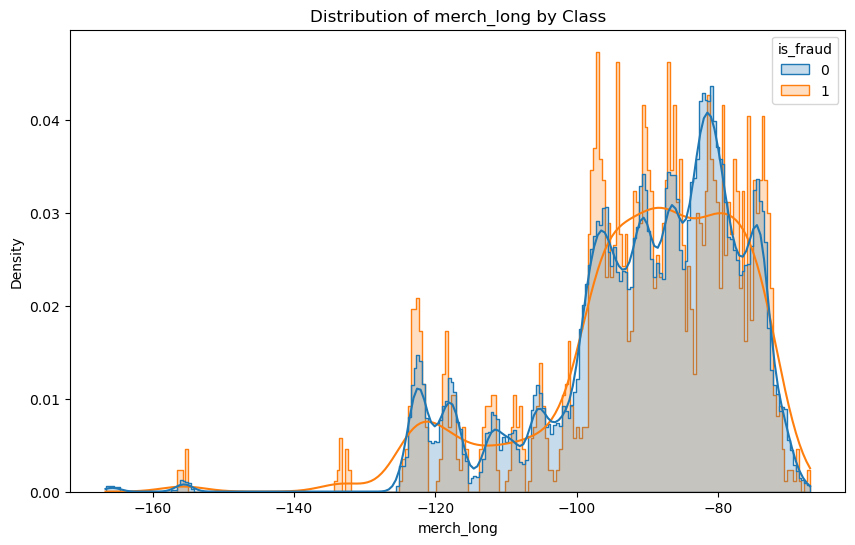

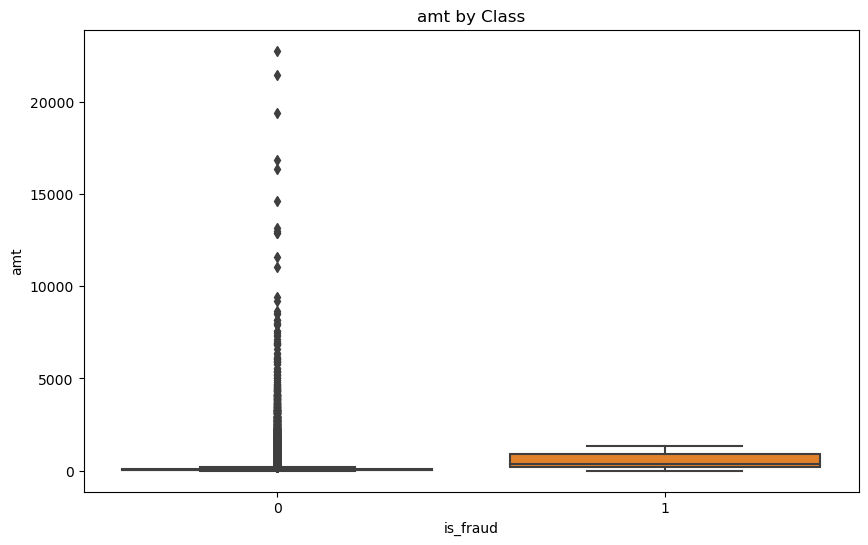

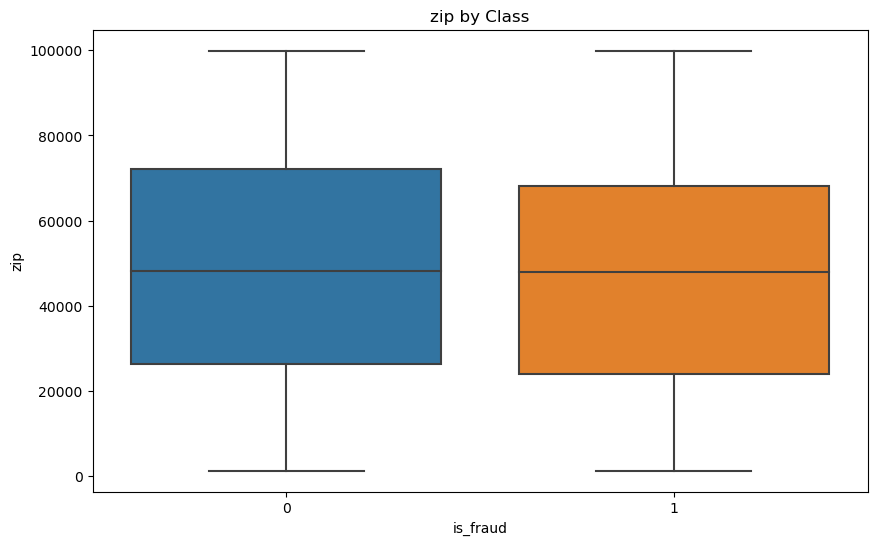

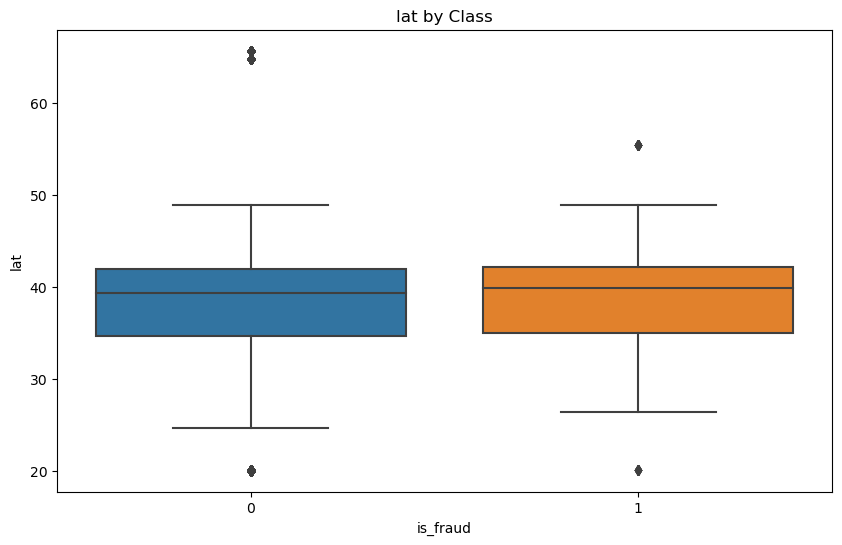

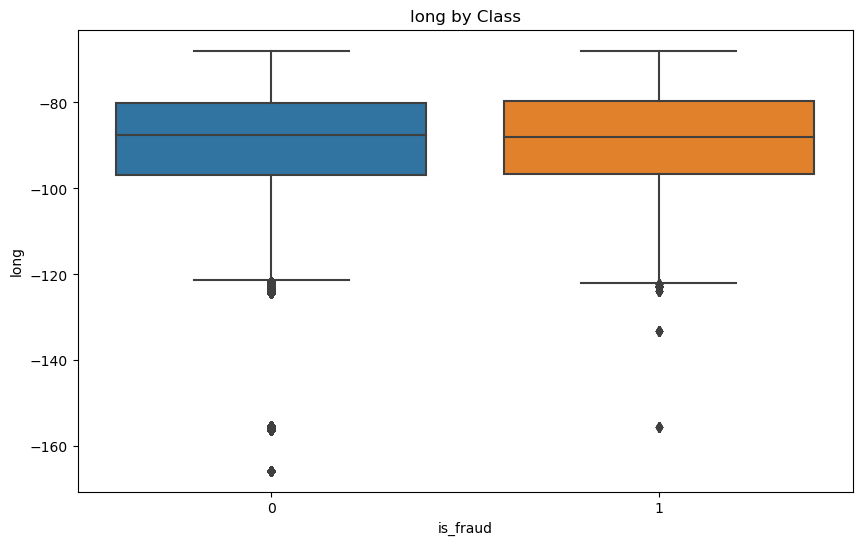

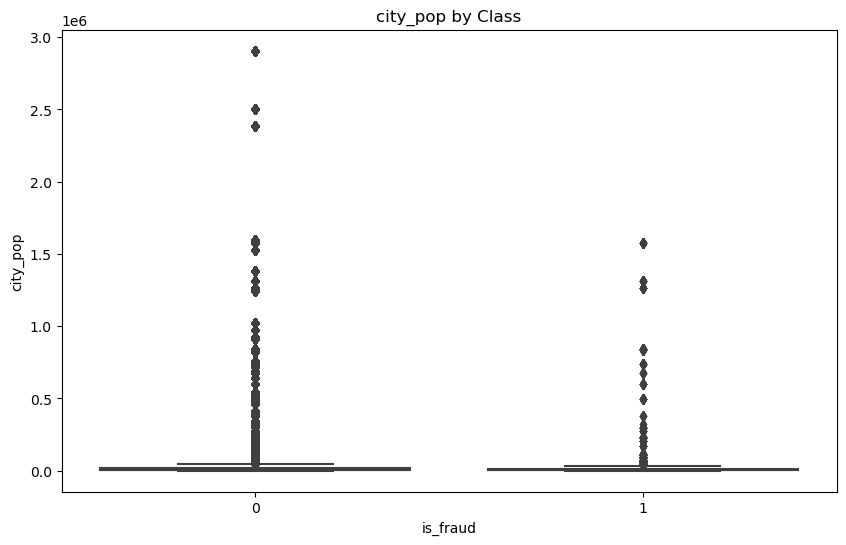

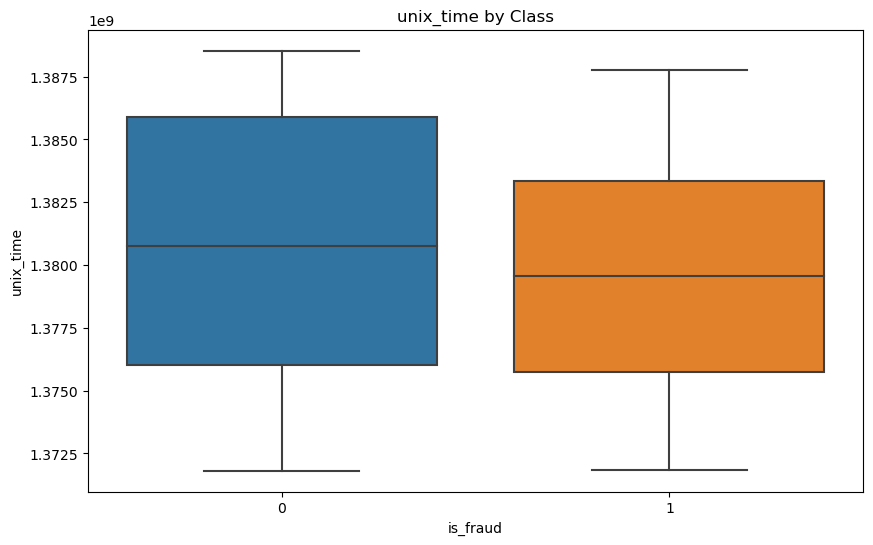

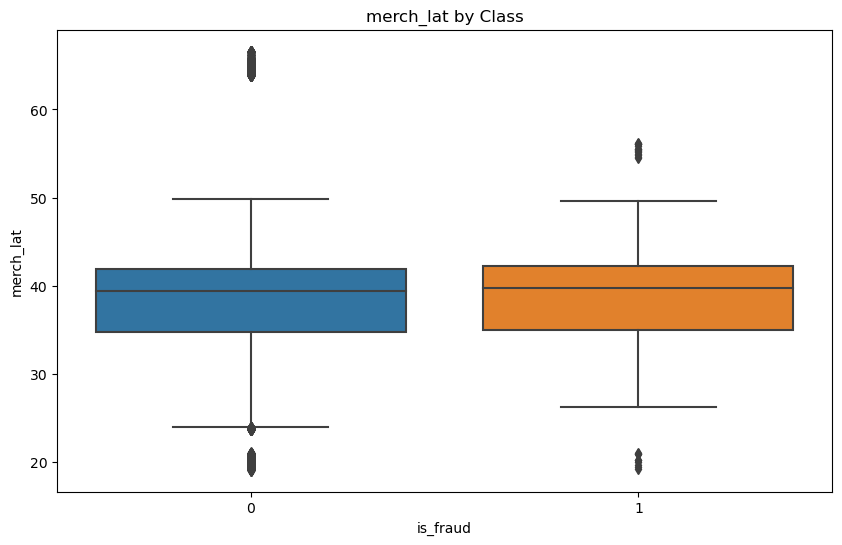

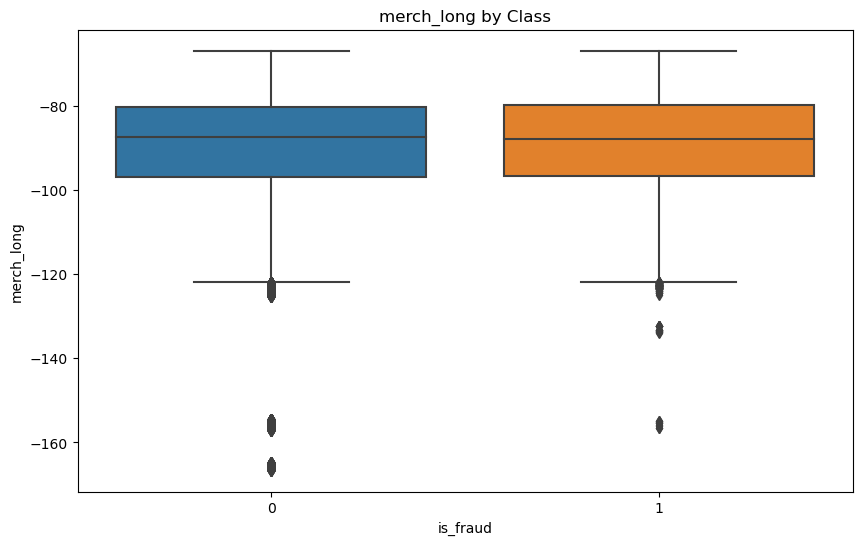

In [17]:
# Function to plot the distribution of features based on class
def plot_feature_distribution(df, features):
    for feature in features:
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df, x=feature, hue='is_fraud', kde=True, element="step", stat="density", common_norm=False)
        plt.title(f'Distribution of {feature} by Class')
        plt.show()

# List of features to plot
features = ['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']

# Plot the distributions
plot_feature_distribution(df, features)

# Function to plot boxplots of features based on class
def plot_feature_boxplots(df, features):
    for feature in features:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='is_fraud', y=feature, data=df)
        plt.title(f'{feature} by Class')
        plt.show()

# Plot the boxplots
plot_feature_boxplots(df, features)

In [18]:
# Extract month and year from 'trans_date'
df['trans_month_year'] = df['trans_date'].dt.to_period('M')

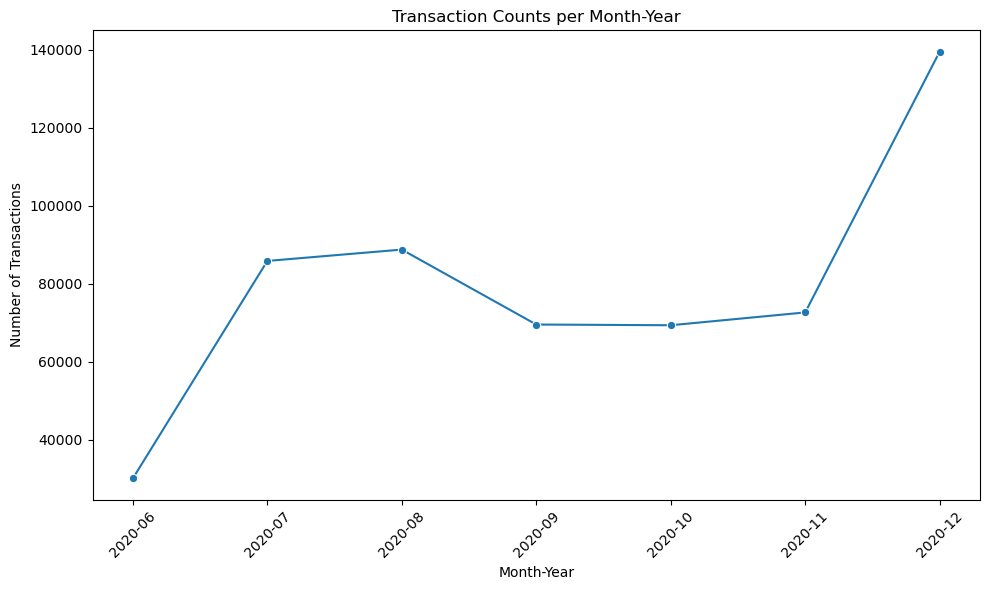

In [19]:
# EDA based on trans_month_year
# Example: Count of transactions per month and year
transaction_counts = df['trans_month_year'].value_counts().sort_index()

# Plotting transaction counts over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=transaction_counts.index.astype(str), y=transaction_counts.values, marker='o')
plt.xticks(rotation=45)
plt.title('Transaction Counts per Month-Year')
plt.xlabel('Month-Year')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

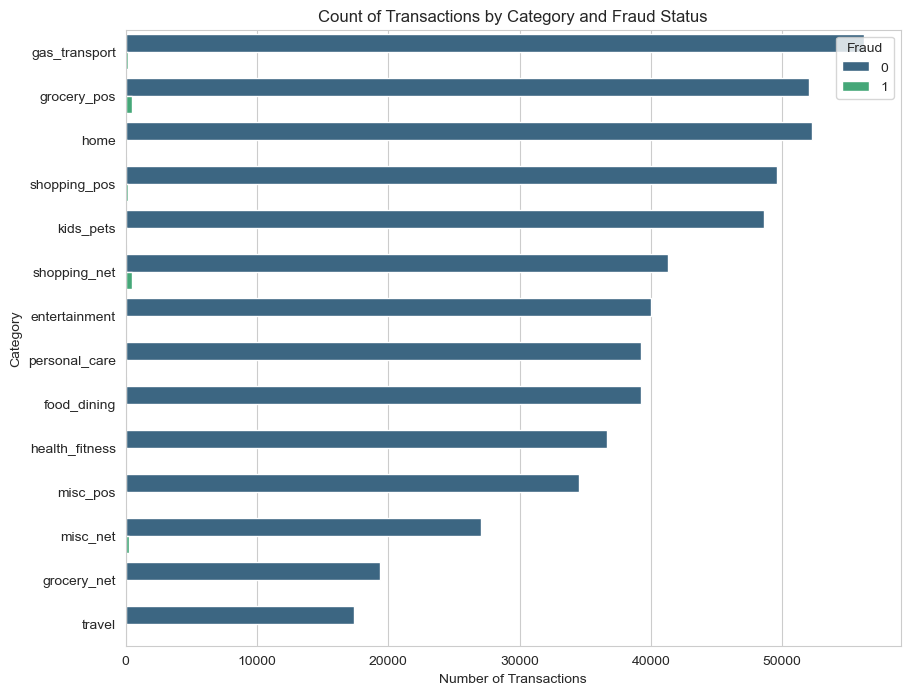

In [57]:
# Plotting the horizontal bar plot for transactions by category
plt.figure(figsize=(10, 8))

# Countplot for both fraudulent and non-fraudulent transactions
sns.countplot(y='category', hue='is_fraud', data=df, palette='viridis', order=df['category'].value_counts().index)

plt.title('Count of Transactions by Category and Fraud Status')
plt.xlabel('Number of Transactions')
plt.ylabel('Category')
plt.legend(title='Fraud', loc='upper right')
plt.show()

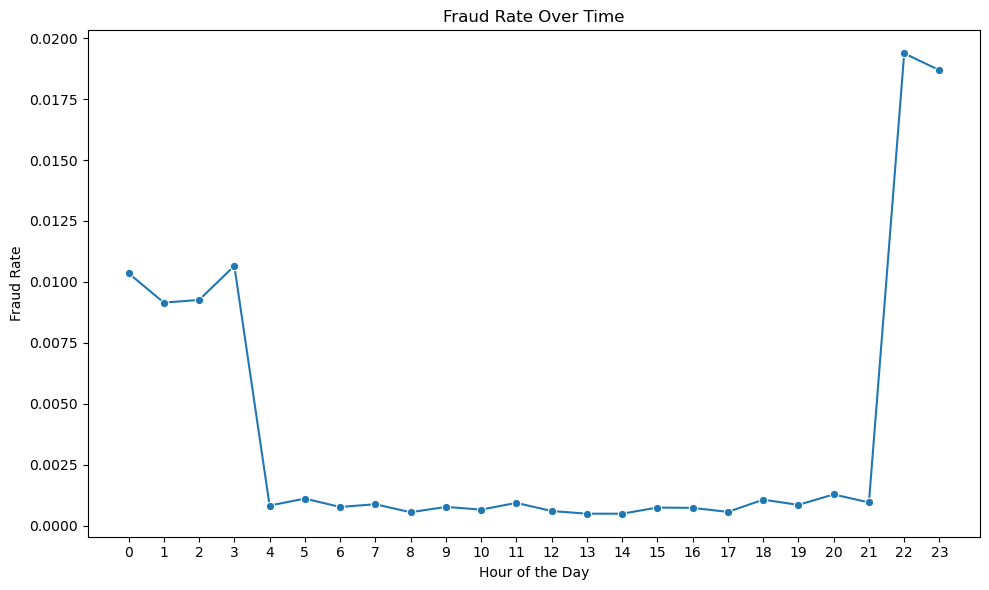

In [21]:
# Assuming 'is_fraud' column exists
fraud_by_hour = df.groupby(df['trans_date_trans_time'].dt.hour)['is_fraud'].mean()

# Plotting fraud analysis by time
plt.figure(figsize=(10, 6))
sns.lineplot(x=fraud_by_hour.index, y=fraud_by_hour.values, marker='o')
plt.title('Fraud Rate Over Time')
plt.xlabel('Hour of the Day')
plt.ylabel('Fraud Rate')
plt.xticks(range(24))
plt.tight_layout()
plt.show()

In [25]:
# Create new features: 'transaction_hour', 'transaction_day', 'transaction_month', 'age'
df['transaction_hour'] = df['trans_date_trans_time'].dt.hour
df['transaction_day'] = df['trans_date_trans_time'].dt.day
df['transaction_month'] = df['trans_date_trans_time'].dt.month
df['age'] = (df['trans_date_trans_time'] - df['dob']).dt.days // 365

In [27]:
# Calculate the geographical distance between cardholder and merchant
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

In [29]:
df['distance'] = haversine(df['lat'], df['long'], df['merch_lat'], df['merch_long'])

In [33]:
# Calculate transaction frequency and average amount within the last 24 hours
df = df.sort_values(by=['cc_num', 'trans_date_trans_time'])
df['trans_24h_count'] = df.groupby('cc_num').apply(lambda x: x.rolling('24h', on='trans_date_trans_time').trans_date_trans_time.count()).reset_index(level=0, drop=True)
df['trans_24h_amount_avg'] = df.groupby('cc_num').apply(lambda x: x.rolling('24h', on='trans_date_trans_time').amt.mean()).reset_index(level=0, drop=True)

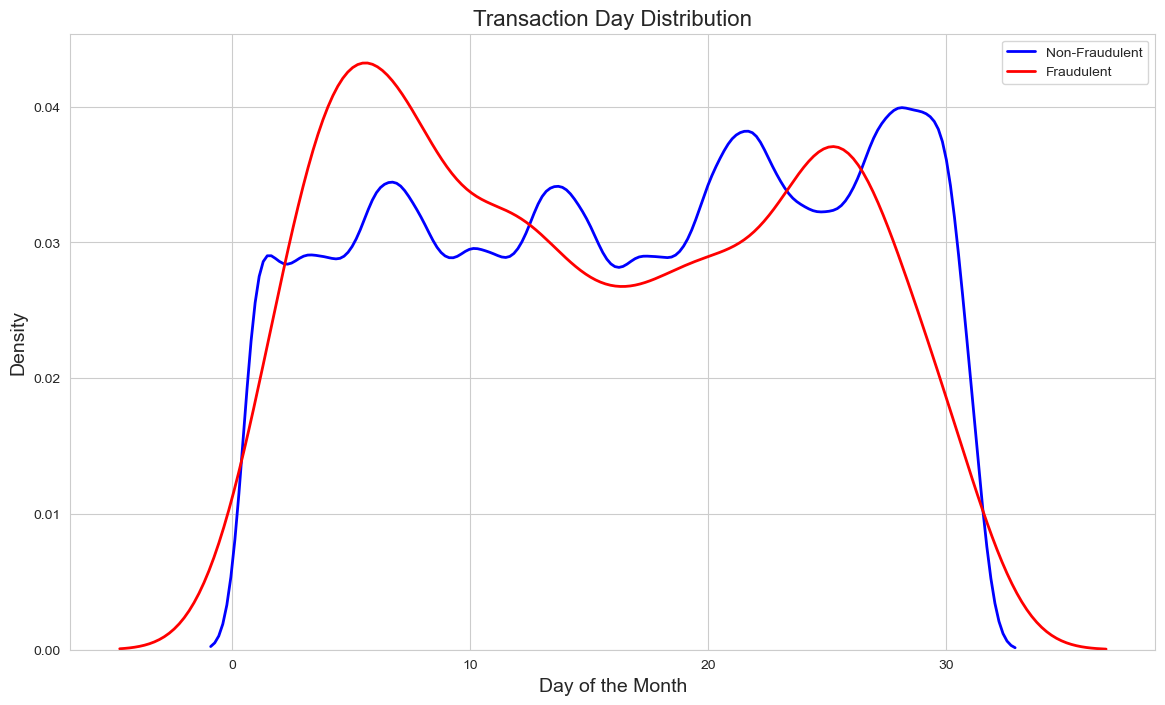

Correlation between transaction day and fraud: -0.01


In [52]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Improved Visualization: Transaction Day
plt.figure(figsize=(14, 8))

# Plot density plots
sns.kdeplot(df[df['is_fraud'] == 0]['transaction_day'], color='blue', label='Non-Fraudulent', lw=2)
sns.kdeplot(df[df['is_fraud'] == 1]['transaction_day'], color='red', label='Fraudulent', lw=2)

# Add title and labels
plt.title('Transaction Day Distribution', fontsize=16)
plt.xlabel('Day of the Month', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.show()

# Calculate correlation between transaction day and fraud
correlation = df['transaction_day'].corr(df['is_fraud'])

print(f"Correlation between transaction day and fraud: {correlation:.2f}")

Correlation between transaction amount and fraud: 0.18


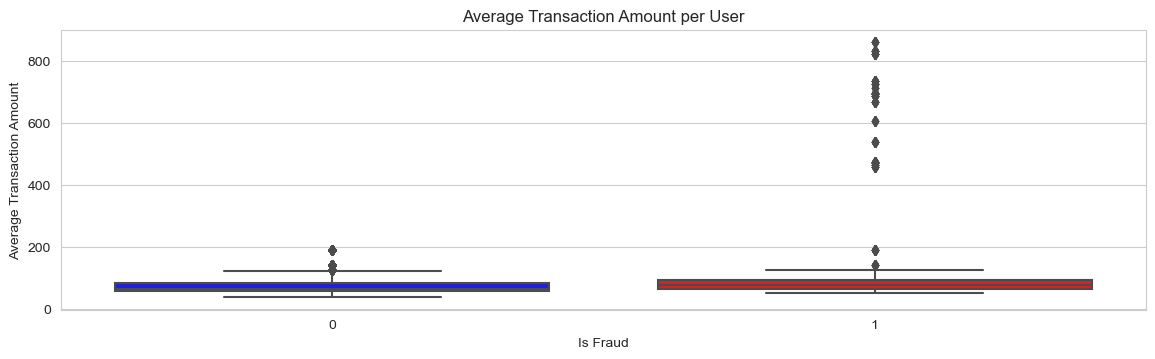

In [53]:
# Calculate the average and total transaction amount per user
df['avg_trans_amount'] = df.groupby('cc_num')['amt'].transform('mean')
df['total_trans_amount'] = df.groupby('cc_num')['amt'].transform('sum')

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Visualization: Average Transaction Amount per User
plt.figure(figsize=(14, 8))

# Boxplot
plt.subplot(2, 1, 1)
sns.boxplot(x='is_fraud', y='avg_trans_amount', data=df, palette={0: 'blue', 1: 'red'})
plt.title('Average Transaction Amount per User')
plt.xlabel('Is Fraud')
plt.ylabel('Average Transaction Amount')

# Calculate correlation between transaction amount ('amt') and fraud ('is_fraud')
correlation = df['amt'].corr(df['is_fraud'])

print(f"Correlation between transaction amount and fraud: {correlation:.2f}")

In [55]:
# Assuming 'df' is your DataFrame containing transaction data
# Convert 'dob' to datetime and calculate age
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = (pd.Timestamp.now() - df['dob']).astype('<m8[Y]')

# Define age groups (you can adjust these as per your specific age ranges)
bins = [0, 20, 30, 40, 50, 60, 100]  # Define your age bins here
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']  # Labels for age groups

# Assign age groups based on 'age' column
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Group by age group and calculate correlation between age group and fraud
age_group_corr = df.groupby('age_group')['is_fraud'].mean()

print("Correlation between age group and fraud:")
print(age_group_corr)

Correlation between age group and fraud:
age_group
0-20     0.000000
21-30    0.004129
31-40    0.003253
41-50    0.003262
51-60    0.003823
61+      0.004807
Name: is_fraud, dtype: float64


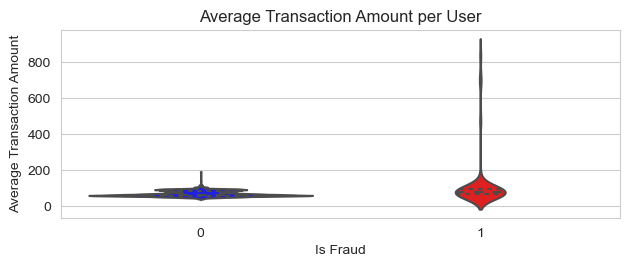

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

In [43]:
# Violin plot
plt.subplot(2, 1, 2)
sns.violinplot(x='is_fraud', y='avg_trans_amount', data=df, palette={0: 'blue', 1: 'red'}, inner='quartile')
plt.title('Average Transaction Amount per User')
plt.xlabel('Is Fraud')
plt.ylabel('Average Transaction Amount')

plt.tight_layout()
plt.show()

# Visualization: Total Transaction Amount per User
plt.figure(figsize=(14, 8))

In [46]:
# Calculate quartiles
Q1 = df['amt'].quantile(0.25)
Q3 = df['amt'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['amt'] < lower_bound) | (df['amt'] > upper_bound)]


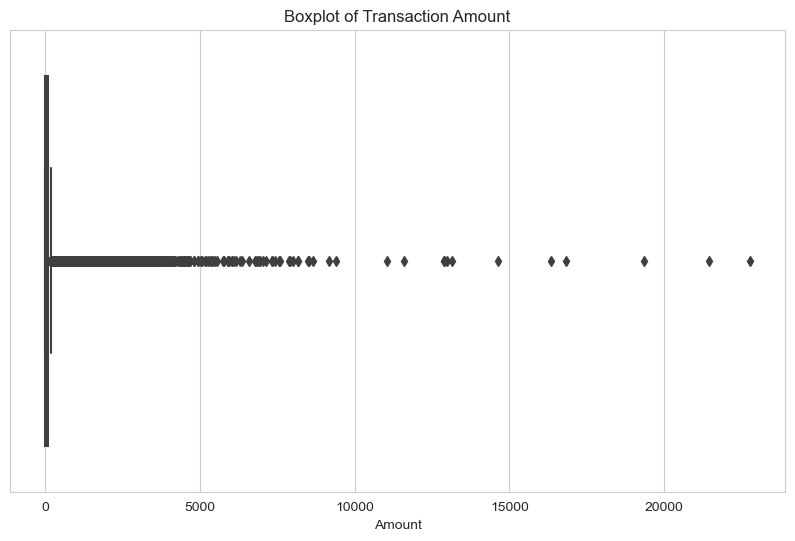

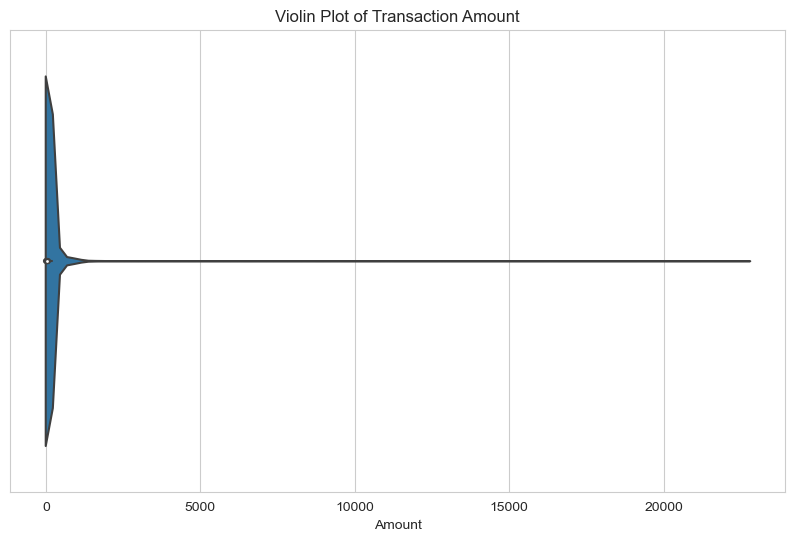

In [47]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='amt', data=df)
plt.title('Boxplot of Transaction Amount')
plt.xlabel('Amount')
plt.show()

# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='amt', data=df)
plt.title('Violin Plot of Transaction Amount')
plt.xlabel('Amount')
plt.show()

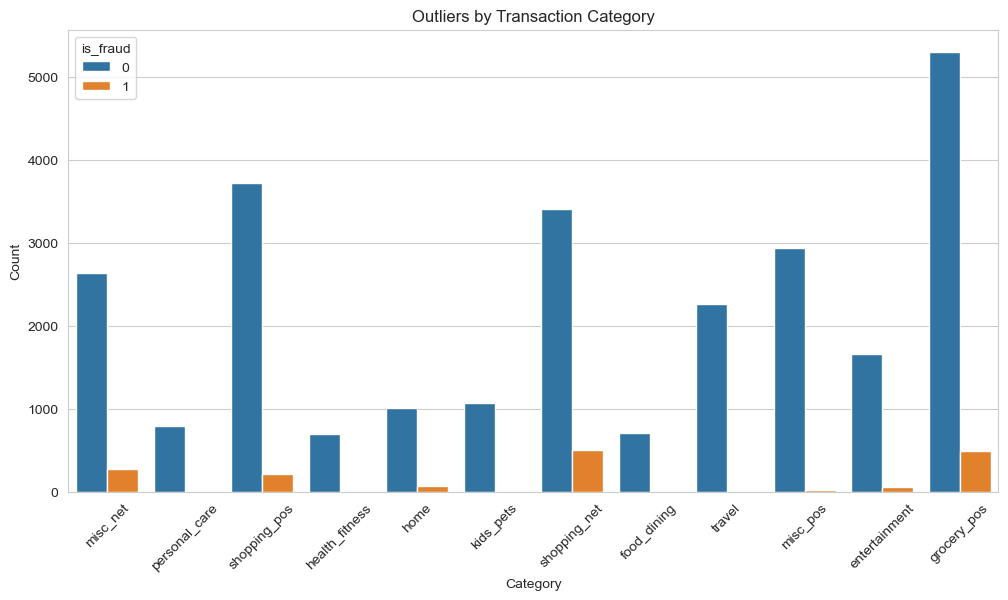

In [48]:
plt.figure(figsize=(12, 6))
sns.countplot(x='category', hue='is_fraud', data=outliers)
plt.title('Outliers by Transaction Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

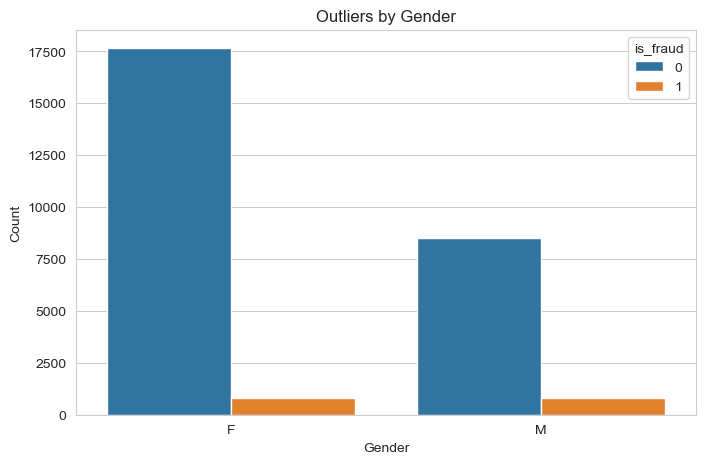

In [49]:
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', hue='is_fraud', data=outliers)
plt.title('Outliers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [50]:
# Assuming 'outliers' DataFrame contains your identified outliers
# Calculate the total number of outliers
total_outliers = outliers.shape[0]

# Calculate the number of outliers that are fraud cases
fraud_outliers = outliers[outliers['is_fraud'] == 1].shape[0]

# Calculate the percentage of outliers that are fraud cases
percentage_fraud_outliers = (fraud_outliers / total_outliers) * 100

print(f"Total number of outliers: {total_outliers}")
print(f"Number of fraud cases among outliers: {fraud_outliers}")
print(f"Percentage of outliers that are fraud cases: {percentage_fraud_outliers:.2f}%")

Total number of outliers: 27778
Number of fraud cases among outliers: 1613
Percentage of outliers that are fraud cases: 5.81%
